In [1]:
import pandas as pd
import ast
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import random
import seaborn as sns

In [2]:
arquivo_checkm2_milk = 'quality_report_Checkm2_milk.csv'
df_genomas = pd.read_csv(arquivo_checkm2_milk, sep='\t')

In [3]:
def classificar_qualidade(completeness, contaminacao):
    if completeness > 90 and contaminacao < 5:
        return 'Qualidade Alta'
    elif completeness >= 50 and contaminacao < 10:
        return 'Qualidade Média'
    elif completeness < 50 and contaminacao < 10:
        return 'Baixa qualidade'
    else:
        return 'Não classificado'

# Aplicar a função de classificação aos dados do DataFrame
df_genomas['Qualidade'] = df_genomas.apply(lambda row: classificar_qualidade(row['Completeness'], row['Contamination']), axis=1)

# Exibir o DataFrame com a coluna de qualidade adicionada
contagem_qualidade = df_genomas['Qualidade'].value_counts()

print('Checkm 2')
print(contagem_qualidade)


Checkm 2
Qualidade
Baixa qualidade     133
Qualidade Média     123
Não classificado      6
Qualidade Alta        1
Name: count, dtype: int64


In [4]:
df_genomas

,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Total_Contigs,Max_Contig_Length,Additional_Notes,Qualidade
0,SRR5723796_baby_1month_bins.1,36.67,0.13,Neural Network (Specific Model),11,0.859,56377,333.038504,1056110,0.42,909,29,118135,NaN,Baixa qualidade
1,SRR5723796_baby_1month_bins.10,64.96,2.79,Neural Network (Specific Model),11,0.871,125915,327.986367,1407452,0.39,1247,18,286317,NaN,Qualidade Média
2,SRR5723796_baby_1month_bins.11,11.61,0.01,Neural Network (Specific Model),11,0.912,210854,339.048387,276284,0.59,248,3,210854,NaN,Baixa qualidade
3,SRR5723796_baby_1month_bins.12,41.08,0.02,Neural Network (Specific Model),11,0.895,4995,291.001064,915809,0.43,940,195,14896,NaN,Baixa qualidade
4,SRR5723796_baby_1month_bins.13,26.23,0.09,Neural Network (Specific Model),11,0.869,81546,404.905530,606662,0.59,434,7,158169,NaN,Baixa qualidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,SRR5723874_baby_1month_bins.8,83.68,0.16,Neural Network (Specific Model),11,0.878,72493,330.484902,2576814,0.64,2285,57,161357,NaN,Qualidade Média
259,SRR5723877_baby_6month_bins.4,83.78,0.18,Neural Network (Specific Model),11,0.895,93910,323.846350,3829533,0.54,3534,61,216396,NaN,Qualidade Média
260,SRR5723884_baby_6month_bins.4,69.03,0.11,Neural Network (Specific Model),11,0.885,27188,300.246631,2261189,0.62,2226,115,106340,NaN,Qualidade Média
261,SRR5723885_baby_1month_bins.7,68.67,0.13,Neural Network (Specific Model),11,0.860,26929,319.770892,2370891,0.42,2130,132,83136,NaN,Qualidade Média


In [5]:
#Eliminando os de baixa qualidade

df_genomas_filtrado = df_genomas[df_genomas['Qualidade'] != 'Baixa qualidade']
df_genomas_filtrado = df_genomas_filtrado[df_genomas_filtrado['Qualidade'] != 'Não classificado']
#print(df_genomas_filtrado)

df_genomas_baixa_qualidade  = df_genomas[df_genomas['Qualidade'] != 'Qualidade Média']
df_genomas_baixa_qualidade = df_genomas_baixa_qualidade[df_genomas_baixa_qualidade['Qualidade'] != 'Qualidade Alta']
df_genomas_baixa_qualidade.to_excel('Genomas_baixa_qualidade.xlsx', index=False)

df_genomas_qualidade_média = df_genomas[df_genomas['Qualidade'] != 'Baixa qualidade']
df_genomas_qualidade_média = df_genomas_qualidade_média[df_genomas_qualidade_média['Qualidade'] != 'Qualidade Alta']
df_genomas_qualidade_média = df_genomas_qualidade_média[df_genomas_qualidade_média['Qualidade'] != 'Não classificado']
df_genomas_qualidade_média.to_excel('Genomas_qualidade_media.xlsx', index=False)

df_genomas_qualidade_alta = df_genomas[df_genomas['Qualidade'] != 'Baixa qualidade']
df_genomas_qualidade_alta = df_genomas_qualidade_alta[df_genomas_qualidade_alta['Qualidade'] != 'Qualidade Média']
df_genomas_qualidade_alta = df_genomas_qualidade_alta[df_genomas_qualidade_alta['Qualidade'] != 'Não classificado']
df_genomas_qualidade_alta.to_excel('Genomas_qualidade_alta.xlsx', index=False)


## Gráfico 1 - Completeness x Contamination

<Figure size 576x288 with 0 Axes>

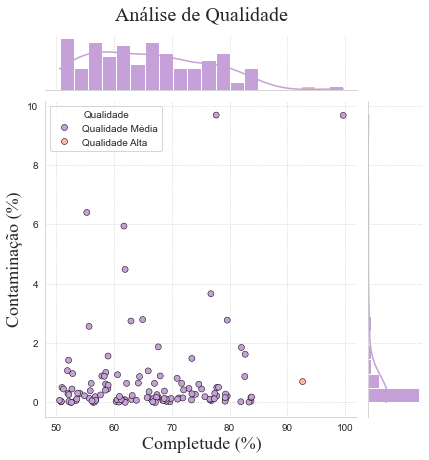

In [14]:
df_genomas_filtrado.loc[df_genomas_filtrado['Qualidade'] == 'Qualidade Média', 'Cor'] = 'purple'
df_genomas_filtrado.loc[df_genomas_filtrado['Qualidade'] == 'Qualidade Alta', 'Cor'] = 'lightgreen'
plt.figure(figsize=(8, 4))

sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})
g = sns.JointGrid(data=df_genomas_filtrado, x='Completeness', y='Contamination', hue='Qualidade')
g.plot_joint(sns.scatterplot, alpha=1,edgecolor='black', linewidth=0.5, palette={'Qualidade Média': '#c6a0d8', 'Qualidade Alta': '#ffb6a5'})
g.plot_marginals(sns.histplot, alpha=1, bins=20, kde=True, palette={'Qualidade Média': '#c6a0d8', 'Qualidade Alta': '#ffb6a5'})


g.ax_joint.set_xlabel("Completude (%)", fontsize=18, fontname= 'Times New Roman')
g.ax_joint.set_ylabel("Contaminação (%)", fontsize=18, fontname= 'Times New Roman')
g.ax_joint.set_title("Análise de Qualidade", fontsize=20, fontname= 'Times New Roman', pad=80)


plt.savefig('Checkm2_TCC_Milk.png')


## Gráfico 2 - Genome size x GC content

In [7]:
Genome_size = df_genomas_filtrado['Genome_Size']
GC = df_genomas_filtrado['GC_Content']*100

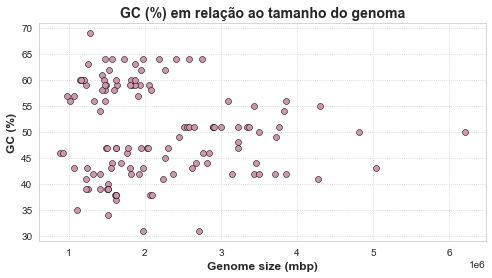

In [16]:
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})
plt.figure(figsize=(8, 4))
ax = sns.scatterplot(data=df_genomas_filtrado, x=Genome_size, y=GC, color = '#ce95ac', edgecolor='black', linewidth=0.5)

ax.set_xlabel("Genome size (mbp)", fontsize = 12, fontweight='bold')
ax.set_ylabel("GC (%)", fontsize =12, fontweight='bold')
ax.set_title("GC (%) em relação ao tamanho do genoma", fontsize=14, fontweight='bold')
plt.savefig('gc_gensize.png')
plt.show()

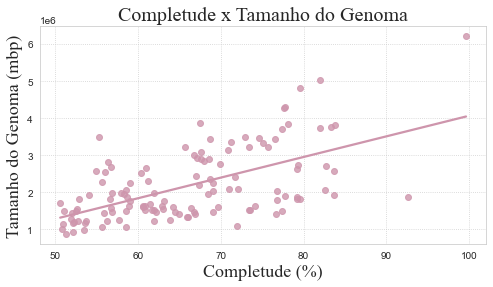

In [18]:
plt.figure(figsize=(8, 4))  # Define o tamanho da figura antes do gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})
ax = sns.regplot(data=df_genomas_filtrado, x='Completeness', y='Genome_Size', color='#ce95ac', ci=None)

ax.set_xlabel("Completude (%)", fontsize=18, fontname='Times New Roman')
ax.set_ylabel("Tamanho do Genoma (mbp)", fontsize=18, fontname='Times New Roman')
ax.set_title("Completude x Tamanho do Genoma", fontsize=20, fontname='Times New Roman')

plt.savefig('complet_gs.png')
plt.show()
